Welcome to the **phytocomplex bioactivity estimation tool**. By uploading a list of molecules belonging to a phytocomplex into a single file, this tool provides an estimate of its biological activity. This is achieved by comparing the fingerprints of the phytocomplex molecules with those of a library of compounds and drugs (1700 molecules with known activity) using the Tanimoto similarity coefficient. The resulting dataset is then analyzed through various visualizations.

The following Python code will load parsley compounds (see reference 1 for the study from which these compounds were taken), download them in SDF format from PubChem, and merge them into a single file (see the code section for merging multiple files). For each parsley compound, fingerprints will be calculated and compared to each compound in a library (reference 2) of compounds with known activity. A Tanimoto similarity search will be performed, and the results will be saved in an Excel file. This table will be augmented with molecular targets, CAS numbers, and biological activity for each compound in the library. The data will then be sorted based on the Tanimoto similarity, and the Excel table will be analyzed using Python libraries to create graphs."

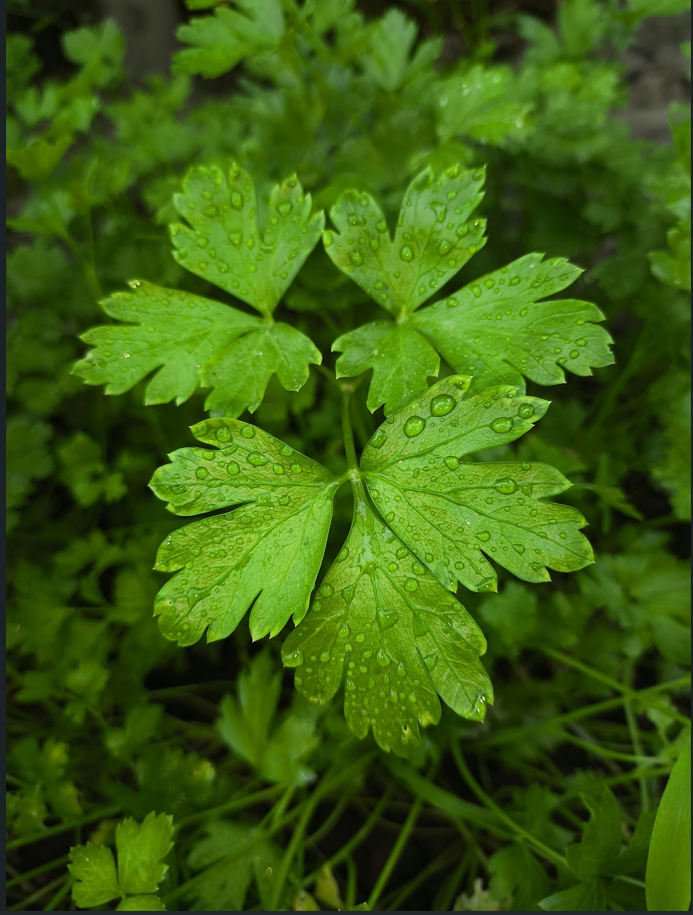

anna-evans-parsley-unsplash


Notebook Purpose:

This notebook estimates the biological activity of a phytocomplex (mixture of plant compounds) by comparing its constituent molecules with a library of known compounds and their activities.
Code Sections:

Data Loading and Preparation:

Loads parsley compounds from a user-provided SDF file.
Downloads an approved drug library (Approveddrugslibrary.sdf) containing known activities and targets.
Reads target information, CAS numbers, and bioactivities from separate Excel files.
Fingerprint Calculation and Similarity Analysis:

Calculates Morgan fingerprints for each molecule to represent their structural features.
Compares the fingerprints of parsley compounds with those in the library using the Tanimoto similarity coefficient (a measure of structural similarity).
Creates a DataFrame containing the similarity scores, target information, CAS numbers, and bioactivities for each comparison.
Visualization and Analysis:

Generates a scatter plot to visualize the distribution of Tanimoto similarity scores for each parsley compound.
Creates a bar chart to show the frequency of different protein targets associated with the parsley compounds.
Constructs a network visualization to depict the interactions between parsley compounds and potential target molecules.
Generates a boxplot to analyze the distribution of Tanimoto similarity scores across different targets.
Overall, the code effectively utilizes Python libraries like pandas, RDKit, matplotlib, and plotly to perform data manipulation, fingerprint analysis, and various visualizations.

Additional Notes:

The code assumes the required files (SDF files and Excel sheets) are uploaded to the same directory as the notebook.
Error handling is implemented to gracefully handle potential issues like missing files or incorrect data formats.
The comments throughout the code explain each step, making it easier to understand and modify.
The following code requires the combined phytocomplex compound file. You can either copy and paste the compounds into a single text file using a text editor, naming it "parsley_combined_compounds" and placing it in the same directory as the notebook, or specify the path to the file. Additionally, the code requires the 'approveddruglibrary' library and three Excel files containing the target list, CAS numbers, and biological activity of the library compounds

In order to execute this notebook, you'll need to upload the required files to the directory where the notebook is currently stored
Required files for the first part of the code: Google Drive link(approveddruglibrary.sdf):

 https://drive.google.com/file/d/1-2MA0z3aY1z4ehKucG9WdRSQI9ukTfZU/view?usp=sharing

Target.xlsx

https://docs.google.com/spreadsheets/d/1-89qocFgtaMmxBDxJMEdDv0bmzDHnAJN/edit?usp=sharing&ouid=102839831599187052035&rtpof=true&sd=true

bioattività.xlsx

https://docs.google.com/spreadsheets/d/1-BsViQRijOl9VXqAmQmI1SBUvYHg8EfT/edit?usp=sharing&ouid=102839831599187052035&rtpof=true&sd=true

ncas.xlsx

https://docs.google.com/spreadsheets/d/1-32zFcXeukPG2IDyCNEJkcTyebV9liwN/edit?usp=sharing&ouid=102839831599187052035&rtpof=true&sd=true

prezzemolo_composti_uniti.sdf


https://drive.google.com/file/d/1-0CIctdTPBYq6GW_BeNOo0nrxgSOSR3Q/view?usp=sharing


In [ ]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs

def load_molecules(filename):
    """Carica le molecole da un file SDF."""
    suppl = Chem.SDMolSupplier(filename)
    return [mol for mol in suppl if mol is not None]

# Carica le molecole
molecole_assenzio = load_molecules("/content/drive/MyDrive/fitocomplesso/prezzemolo_composti_uniti.sdf")
molecole_libreria = load_molecules("/content/drive/MyDrive/fitocomplesso/Approveddrugslibrary.sdf")

# Calcola i fingerprint (semplificato per chiarezza)
fps_assenzio = [AllChem.GetMorganFingerprintAsBitVect(mol, 2) for mol in molecole_assenzio]
fps_libreria = [AllChem.GetMorganFingerprintAsBitVect(mol, 2) for mol in molecole_libreria]

# Carica i dati dai file Excel
df_targets = pd.read_excel("/content/drive/MyDrive/fitocomplesso/targets.xlsx")
df_ncas = pd.read_excel("/content/drive/MyDrive/fitocomplesso/ncas.xlsx")
df_bioattività = pd.read_excel("/content/drive/MyDrive/fitocomplesso/bioattività.xlsx")

# Funzione per calcolare la similarità di Tanimoto e creare un DataFrame
def create_similarity_df(fp_assenzio, fp_libreria, index_assenzio, df_targets, df_ncas):
    """Crea un DataFrame con le similarità di Tanimoto e i dati associati."""
    similarities = [DataStructs.TanimotoSimilarity(fp_assenzio, fp_libreria) for fp_libreria in fps_libreria]
    df = pd.DataFrame({'Indice_Prezzemolo': index_assenzio,
                       'Indice_Libreria': range(len(similarities)),
                       'Similarità_Tanimoto': similarities,
                       'Target': df_targets['targets'].values,
                       'Numero_CAS': df_ncas['ncas'].values,
                       'bioattività': df_bioattività['bioattività'].values})
    df = df.sort_values(by='Similarità_Tanimoto', ascending=False)
    return df.head(20)

# Crea una lista di DataFrame, uno per ogni composto dell'assenzio
dfs = []
for i, fp_assenzio in enumerate(fps_assenzio):
    df = create_similarity_df(fp_assenzio, fps_libreria, i, df_targets, df_ncas)
    dfs.append(df)

# Concatena tutti i DataFrame in un unico DataFrame
df_finale = pd.concat(dfs, ignore_index=True)



path_salvataggio = '/content/drive/MyDrive/fitocomplesso/'
nome_file = 'risultati_tanimoto_prezzemolo_bioattività.xlsx'
df_finale.to_excel(path_salvataggio + nome_file, index=False)

The following table represents the Excel file generated by the first part of the code. The columns contain the following information:

Parsley compound index: Identifies the parsley compound involved in the comparison.
Library compound index: Identifies the library compound being compared.
Tanimoto coefficient: Measures the structural similarity between the two compounds.
Protein targets: Indicates the cellular proteins that the library compounds may interact with.
CAS number: A unique identifier for each library compound.
Bioactivity: Describes the biological activity of the library compound (e.g., enzyme inhibition).
The complete Excel file can be opened and viewed for further analysis.
In this Excel dataset, only the top 20 Tanimoto coefficient values were considered for each parsley compound. The Tanimoto coefficient is a measure of structural similarity between molecules, and selecting the top 20 values helps to identify the library compounds most similar to each parsley compound.

Google Drive link of excell parsley table:

https://docs.google.com/spreadsheets/d/1-EYLQ0jXbWAMVHGV-ojrMDIClADrZQHi/edit?usp=sharing&ouid=102839831599187052035&rtpof=true&sd=true

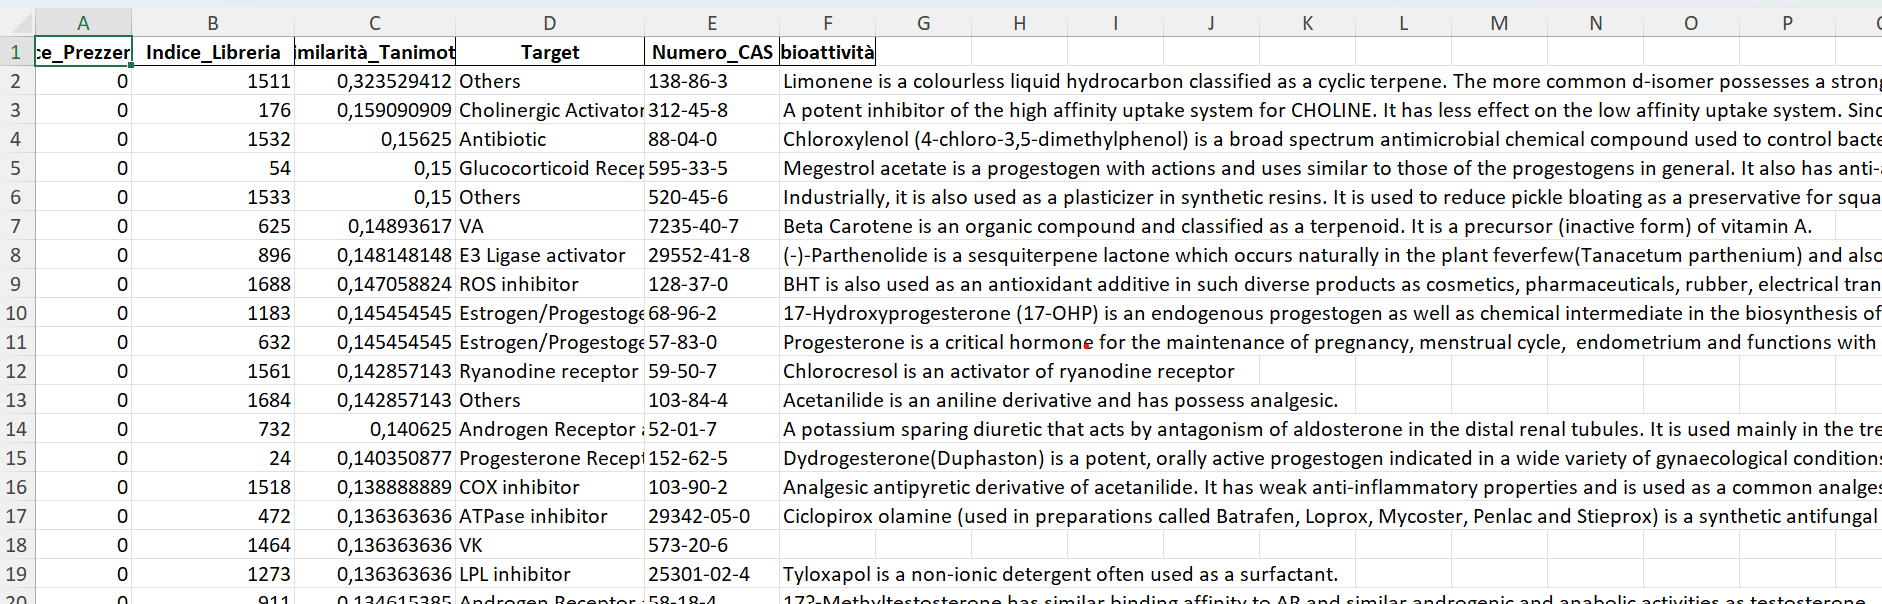

Code to create a scatter plot visualizing the similarity comparisons between parsley compounds

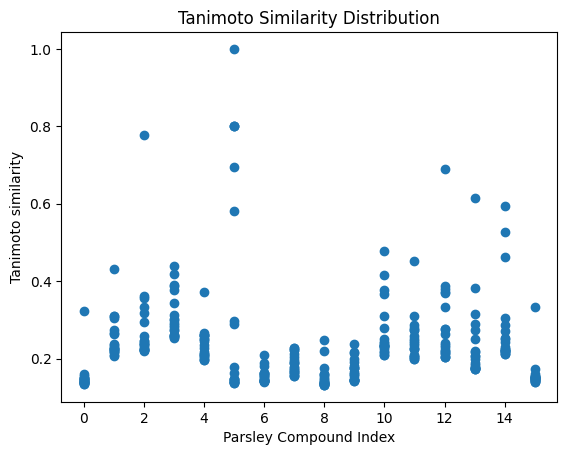

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carica il DataFrame dei risultati
df = pd.read_excel("/content/drive/MyDrive/fitocomplesso/risultati_tanimoto_prezzemolo_bioattività.xlsx")

# Verifica se la colonna 'Indice_Prezzemolo' esiste
if 'Indice_Prezzemolo' not in df.columns:
    print("La colonna 'Indice_Prezzemolo' non è presente nel DataFrame.")
    exit()

# Chiude tutte le figure esistenti
plt.close('all')

# Crea un grafico a dispersione delle similarità
plt.scatter(df['Indice_Prezzemolo'], df['Similarità_Tanimoto'])
plt.xlabel('Parsley Compound Index')
plt.ylabel('Tanimoto similarity')
plt.title('Tanimoto Similarity Distribution')
plt.show()

Graph explanation: For each parsley compound (see the figure below for compound identification) plotted on the x-axis, the corresponding Tanimoto similarity coefficient is indicated. A coefficient of 1 means the compound is an exact match to a compound in the library, and its bioactivity can be directly read from the Excel table. In the scatter plot, the closer a data point is to 1, the higher the probability that the compound exhibits a similar bioactivity to a compound in the library, due to a greater structural similarity.

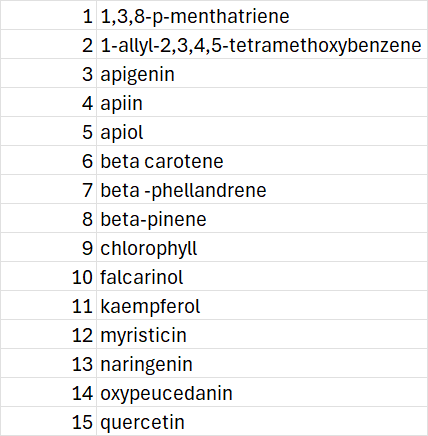

The following code snippet generates a graph of the most frequent targets, obtained by loading and analyzing the Excel file containing the results of the fingerprint comparison.

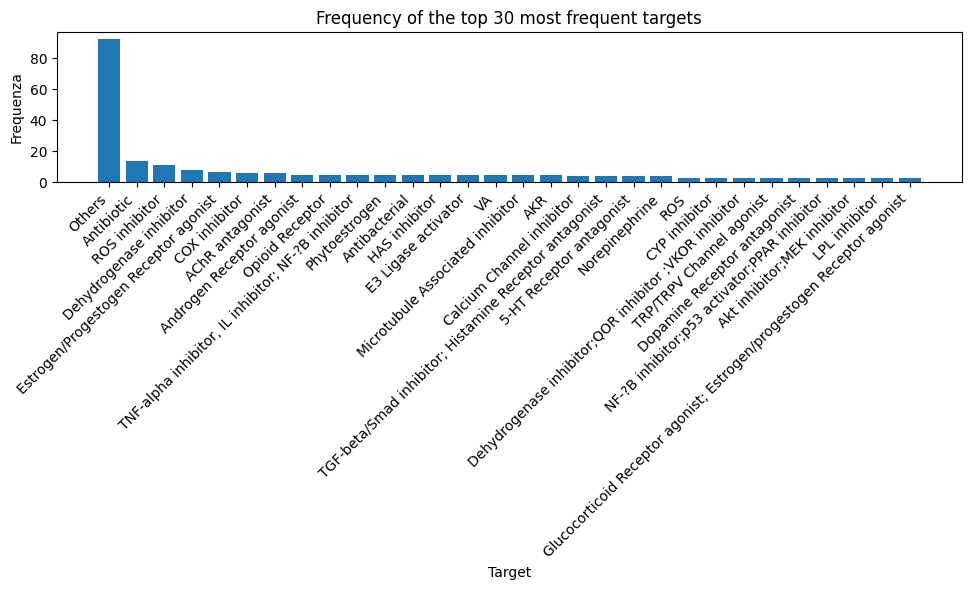

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carica il DataFrame
df = pd.read_excel("/content/drive/MyDrive/fitocomplesso/risultati_tanimoto_prezzemolo_bioattività.xlsx")

# Conta la frequenza di ciascun target
target_counts = df['Target'].value_counts()

# Seleziona i primi 30 target più frequenti
top_30_targets = target_counts.head(30)

# Chiude tutte le figure esistenti
plt.close('all')

# Crea il grafico a barre
plt.figure(figsize=(10, 6))  # Aumenta la larghezza, riduce l'altezza a 3
plt.bar(top_30_targets.index, top_30_targets.values)
plt.xlabel('Target')
plt.ylabel('Frequenza')
plt.title('Frequenza dei primi 30 target più frequenti')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()




plt.show()


The bar chart provides a visual representation of the protein targets most frequently associated with parsley compounds. By comparing the structural similarity of parsley molecules to those in a library, the corresponding protein targets are identified. The height of each bar indicates the number of times a particular protein target is associated with the parsley compounds
The term 'others' appears in the 'targets' column when a molecule in the library does not have a known protein target. For instance, limonene, which has various non-food uses, falls into this category. To delve deeper into the research, please refer to the individual entries in the Excel table.

This code is designed to display the outcomes of a fingerprint comparison, extracted from the Excel file 'risultati_tanimoto_prezzemolo_bioattività.xlsx', in a network visualization.

<ipython-input-3-eef94625a9e6>:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


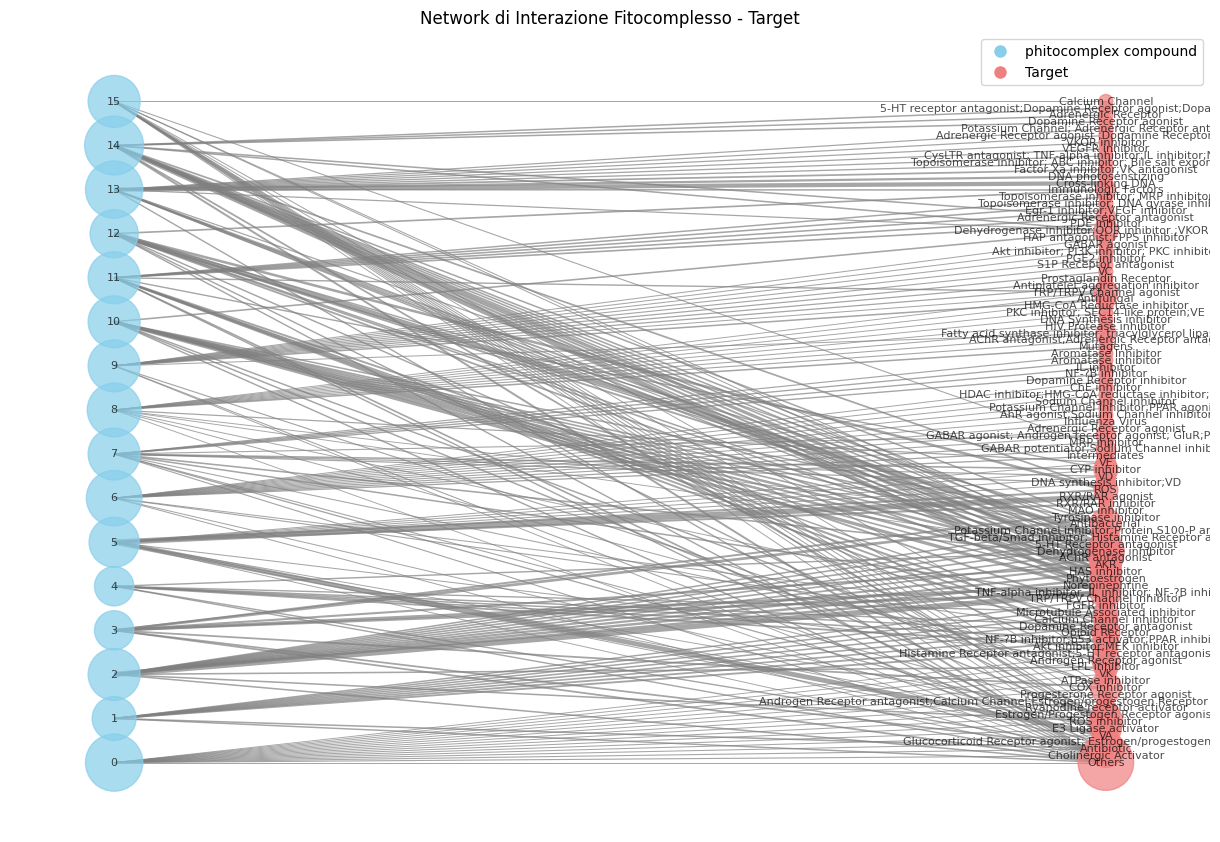


 Network informations:
Number of nodes: 114
Number of arches: 218

Top 5 Targets by Grade:
Others: 16
Antibiotic: 7
Dehydrogenase inhibitor: 7
ROS inhibitor: 6
AChR antagonist: 6

Top 5 Composti per Grado:
Composto 14: 18
Composto 0: 17
Composto 13: 17
Composto 6: 16
Composto 8: 15


In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Carica il DataFrame
df = pd.read_excel("/content/drive/MyDrive/fitocomplesso/risultati_tanimoto_prezzemolo_bioattività.xlsx")


"""filename = "content/drive/MyDrive/fitocomplesso/risultati_tanimoto_prezzemolo_bioattività.xlsx"

try:
    df = pd.read_excel(filename)
except FileNotFoundError:
    print(f"Errore: file '{filename}' non trovato.")
    exit()
except Exception as e:
    print(f"Errore durante la lettura del file Excel: {e}")
    exit()
"""
try:
    composti = df['Indice_Prezzemolo'].unique()
    target = df['Target'].unique()
except KeyError as e:
    print(f"Errore: Colonna non trovata nel file Excel. Controlla i nomi delle colonne. Errore originale: {e}")
    print(f"Le colonne presenti nel file sono: {list(df.columns)}")
    exit()
# Chiude tutte le figure esistenti
plt.close('all')

# Crea un grafo bipartito pesato
B = nx.Graph()

# Aggiungi i nodi (composti e target)
B.add_nodes_from(composti, bipartite=0, node_type='composto')
B.add_nodes_from(target, bipartite=1, node_type='target')

# Aggiungi gli archi CON IL CICLO CORRETTO
for index, row in df.iterrows():
    try:
        peso = float(str(row['Similarità_Tanimoto']).replace(',', '.')) #Conversione a stringa per gestire tipi misti
    except (ValueError, AttributeError):
        print(f"Warning: Valore non numerico trovato in Similarità_Tanimoto alla riga {index+2}. Valore saltato.")
        continue
    B.add_edge(row['Indice_Prezzemolo'], row['Target'], weight=peso)

# ... (resto del codice per la visualizzazione con matplotlib o plotly, come nell'ultima versione)

#VISUALIZZAZIONE CON PLOTLY (consigliata per interattività)
# ... (codice plotly come nell'ultima risposta)

#VISUALIZZAZIONE CON MATPLOTLIB (se preferisci una visualizzazione statica)

# Calcola il grado dei nodi
degree = dict(B.degree())

# Layout per la visualizzazione bipartita
pos = nx.bipartite_layout(B, composti)

# Ottieni i colori per i nodi in base al tipo
node_colors = []
for node in B.nodes():
    if B.nodes[node]['node_type'] == 'composto':
        node_colors.append('skyblue')  # Colore per i composti
    else:
        node_colors.append('lightcoral')  # Colore per i target

# Visualizza il network con dimensioni dei nodi proporzionali al grado e spessore degli archi proporzionale al peso
plt.figure(figsize=(12, 8))

# Ottieni i pesi degli archi per la larghezza
edges_width = [(B[u][v]['weight'])*5 for u,v in B.edges()]

nx.draw(B, pos=pos, with_labels=True, node_color=node_colors,
        node_size=[v * 100 for v in degree.values()], width=edges_width,
        edge_color="gray", alpha=0.7, font_size=8)

plt.title("Network di Interazione Fitocomplesso - Target")

# Aggiunta legenda
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='phitocomplex compound', markerfacecolor='skyblue', markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='Target', markerfacecolor='lightcoral', markersize=10)]
plt.legend(handles=legend_elements, loc="upper right")

plt.tight_layout()
plt.savefig("network_prezzemolo_1.png", dpi=300)
plt.show()


#Stampa informazioni utili
print("\n Network informations:")
print(f"Number of nodes: {B.number_of_nodes()}")
print(f"Number of arches: {B.number_of_edges()}")

# Calcola e stampa i 5 target con il grado maggiore
target_degree = {node: degree[node] for node in target}
sorted_target_degree = sorted(target_degree.items(), key=lambda item: item[1], reverse=True)
print("\nTop 5 Targets by Grade:")
for target, deg in sorted_target_degree[:5]:
    print(f"{target}: {deg}")

# Calcola e stampa i 5 composti con il grado maggiore
comp_degree = {node: degree[node] for node in composti}
sorted_comp_degree = sorted(comp_degree.items(), key=lambda item: item[1], reverse=True)
print("\nTop 5 Composti per Grado:")
for comp, deg in sorted_comp_degree[:5]:
    print(f"Composto {comp}: {deg}")



The network visualized in the file 'network_prezzemolo_1.png' represents the predicted interactions between compounds in the parsley phytocomplex and molecular targets in the library. For a better analysis of the connections, it is suggested to zoom in on the image.

The following code generates a box plot to visualize the distribution of parsley compounds in relation to the library's targets

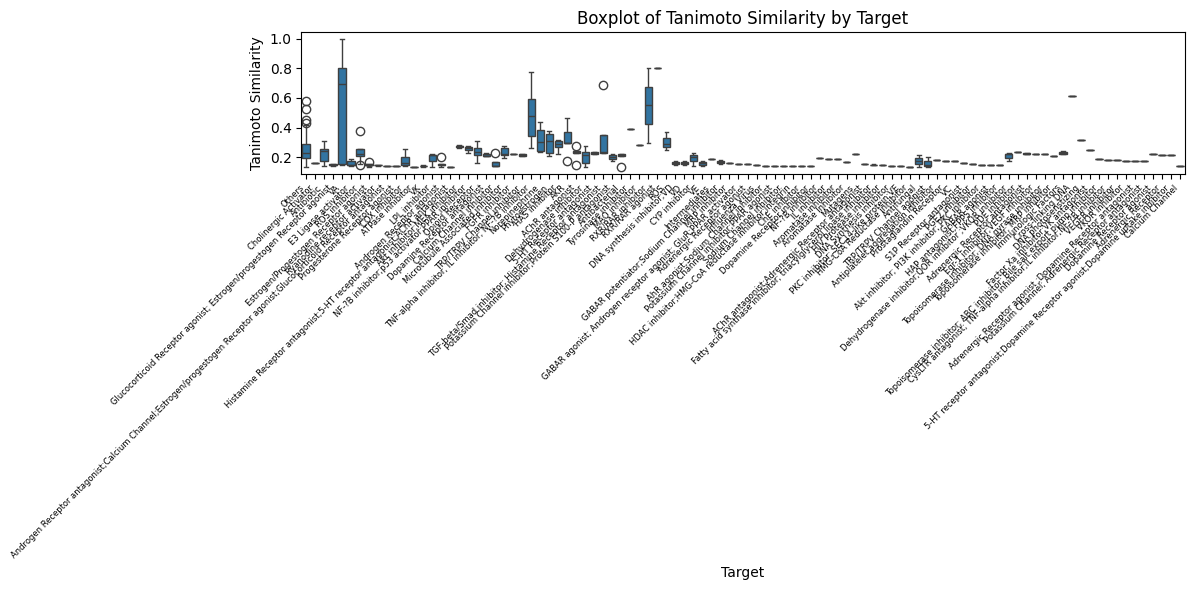

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Carica il file Excel (assicurati di specificare il percorso corretto)
df = pd.read_excel("/content/drive/MyDrive/fitocomplesso/risultati_tanimoto_prezzemolo_bioattività.xlsx")

# Chiude tutte le figure esistenti
plt.close('all')

# Visualizza le prime 5 righe per verificare il caricamento
#print(df.head())
# Assegna il DataFrame a una nuova variabile (se necessario)
data = df
# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Target', y='Similarità_Tanimoto', data=data)



plt.xticks(rotation=45, ha='right')
plt.title('Boxplot of Tanimoto Similarity by Target')

plt.xticks(fontsize=6)  # Imposta la dimensione del font a 8

plt.xlabel('Target')
plt.ylabel('Tanimoto Similarity')

plt.tight_layout()
plt.show()

A box plot is a visual representation of the distribution of a dataset. In your case, it shows the distribution of Tanimoto similarity scores between parsley compounds and library targets.

Box: Represents the middle 50% of the data. The bottom of the box is the first quartile (Q1), the top is the third quartile (Q3), and the line inside is the median.
Whiskers: Extend from the box to show the range of the data, excluding outliers.
Outliers: Individual data points that lie outside the whiskers.
Interpretation in Your Context:

High similarity: Targets with higher box plots and fewer outliers are more likely to interact with parsley compounds.
Variability: Wide boxes indicate high variability in similarity scores.
Outliers: Outliers might represent unique compounds or targets.
Key Points:

Y-axis scale: Understand the range of the similarity scores.
Number of compounds: More compounds per target can provide more robust results.
Comparisons: Compare box plots across different targets to identify patterns.
Box plots help you quickly assess:

The overall distribution of similarity scores.
The presence of outliers.
The potential for interactions between parsley compounds and library targets.

**I asked Gemini to compare the results obtained from the protein target graph with the findings** presented in the study on parsley (A review of botanical characteristics, chemical composition, pharmacological activity and use of parsley)(Ref. 1) and to compare the activities such as antibacterial and anti-inflammatory obtained from the comparison graphs with the results of the study.

Response:

You asked me to compare the protein targets I listed in my previous response with the graph you attached. The graph shows the frequency of the top 30 most frequent targets resulting from the comparison of the fingerprints of some parsley compounds (myristicin, apiol, etc.) with a drug library and their protein targets.

Here is a comparison between the protein targets deduced from the scientific article on the biological activities of parsley and those present in the graph:

Protein targets deduced from the article and possible correspondences in the graph:

Renal Na+/K+ -ATPase: The article mentions the inhibition of this enzyme as the mechanism of parsley's diuretic effect. In the graph, there is no exact match with "Renal Na+/K+ -ATPase", but the closest category could be "Dehydrogenase inhibitor", as ATPases are enzymes. However, this correspondence is weak and uncertain. It is possible that this target is not specifically represented among the top 30 in the graph, or that it is included in the "Others" category.
Voltage-dependent Ca2+ channels: The article indicates the blocking of these channels as the mechanism of the spasmolytic effect. In the graph, we find "Calcium Channel inhibitor", which corresponds directly to this target. This is a strong match.
Xanthine oxidase: The article suggests that parsley may inhibit this enzyme, involved in the synthesis of uric acid. In the graph, there is no direct match. It could be included in "Dehydrogenase inhibitor" but is unlikely, or in the "Others" category.
Inflammatory cytokines (IL-1β, TNF-α): The article mentions the reduction of these cytokines as part of the anti-inflammatory effect. In the graph, we find "TNF-alpha inhibitor, IL inhibitor", which corresponds to this target. This is a strong match.
Antioxidant enzymes (glutathione peroxidase, catalase): The article indicates that parsley can increase the activity of these enzymes. The graph includes "ROS inhibitor", which is related to antioxidant activity, but does not directly correspond to the specific enzymes mentioned. This is a partial match.
Further observations:

Others: The "Others" category in the graph has a very high frequency. This suggests that many targets, potentially including some of those deduced from the article but not explicitly present in the graph, could be grouped here.
Focus of the graph: The graph focuses on the most frequent targets resulting from the comparison of fingerprints. This means that targets with low frequency, even if biologically relevant for parsley, may not be included among the top 30.
Different methodology: The scientific article is based on biological and pharmacological studies, while the graph derives from a comparison of molecular fingerprints. These two methodologies provide complementary but not necessarily coincident information.
Conclusion:

There are some correspondences between the protein targets deduced from the article and those present in the graph, particularly for calcium channels and inflammatory cytokines. Other targets, such as Na+/K+ ATPase and xanthine oxidase, do not find a clear match in the graph, probably due to the analysis methodology and the focus on the most frequent targets. The "Others" category could include some of these missing targets. The comparison highlights the complementarity of the two sources of information: the article provides details on biological mechanisms, while the graph offers an overview of the frequency of interaction with specific pharmacological targets.

Another question:

Let's now compare the biological activities of parsley (especially anti-inflammatory and antibacterial) described in the study with the results of the graph you provided.

Biological activity: Anti-inflammatory

Study: The study indicates that parsley possesses anti-inflammatory activity, mainly attributed to flavonoids. These compounds would act through various mechanisms, including the neutralization of free radicals (especially nitric oxide, NO), the protection of proteins from denaturation, and the stabilization of cell membranes.
Graph: In the graph, there is the category "TNF-alpha inhibitor, IL inhibitor". TNF-alpha (Tumor Necrosis Factor alpha) and interleukins (IL) are pro-inflammatory cytokines. The presence of this category in the graph suggests that parsley compounds show affinity for targets involved in the inflammatory response, thus supporting the anti-inflammatory activity evidenced in the study. This is a strong correlation.
Biological activity: Antibacterial

Study: The study describes the antibacterial activity of parsley, attributed mainly to furanocoumarins and, to a lesser extent, to essential oils. The effectiveness varies depending on the type of bacteria (greater effectiveness against Gram-positive bacteria) and the type of extract (essential oils seem more effective than extracts). Different mechanisms of action are hypothesized, including cell wall lysis, increased membrane permeability, and proton pump dysfunction.
Graph: In the graph, there is the category "Antibacterial". This category clearly indicates that parsley compounds show affinity for targets involved in antibacterial activity. This is a strong correlation.
Additional considerations:

Mechanisms of action: While the graph shows a general affinity for "Antibacterial" targets, the study provides more details on the possible mechanisms of action, such as interaction with the cell wall or bacterial membrane. This difference is due to the nature of the two sources of information: the graph derives from a molecular similarity analysis (fingerprint), while the study reports results of biological and pharmacological studies.
Specificity: The study highlights different antibacterial effectiveness of parsley depending on the type of bacteria. The graph, on the other hand, provides more general information on antibacterial activity, without specifying the target bacteria.
Others: As mentioned, the "Others" category in the graph could include additional targets relevant to anti-inflammatory and antibacterial activities, which have not been explicitly identified among the top 30 most frequent targets.
Conclusion:

The comparison between the biological activities described in the study and the results of the graph shows good agreement, particularly for anti-inflammatory and antibacterial activities. The presence of the categories "TNF-alpha inhibitor, IL inhibitor" and "Antibacterial" in the graph supports the evidence from the study on the activity of these properties of parsley. The differences found mainly concern the level of detail and the specificity of the information, due to the different methodologies used. In summary, the graph reinforces and validates the information provided by the study on the biological properties of parsley.


# **Reference**
1. Punoševac M, Radović J, Leković A, Kundaković-Vasović T. A review of botanical characteristics, chemical composition, pharmacological activity and use of parsley.1 Arh Farm. 2021;71(3):177-196. doi:10.5937/arhfarm71-30800


2. Approveddruglibrary. Dataset of approved drug molecules in SDF format with bioactivity and protein targets. Downloaded from ResearchGate. Special thanks to Dr. William Bains. https://www.researchgate.net/post/FDA_approved_drugs_in_SDF_format

In [ ]:
pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 53.5 MB/s eta 0:00:00
